In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 39.3 MB/s 


In [30]:
import tensorflow as tf

In [31]:
print(tf.__version__)

2.8.0


In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# Seperating Features and Target
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [35]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [36]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [38]:
# Part 2 - Now let's make the ANN!

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [40]:
# Initialising the ANN
classifier = Sequential()

In [41]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [42]:
classifier.add(Dropout(0.30))

In [43]:
# Adding second hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [44]:
classifier.add(Dropout(0.30))

In [45]:
# Adding third hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [46]:
# Adding output hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [47]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
#Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

In [49]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50, callbacks=[callback])

Epoch 1/50
536/536 [==============================] - 3s 4ms/step - loss: 0.5444 - accuracy: 0.7774 - val_loss: 0.4722 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4839 - accuracy: 0.7964 - val_loss: 0.4528 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4675 - accuracy: 0.7972 - val_loss: 0.4441 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4556 - accuracy: 0.8000 - val_loss: 0.4365 - val_accuracy: 0.7978
Epoch 5/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.8069 - val_loss: 0.4317 - val_accuracy: 0.8020
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4406 - accuracy: 0.8071 - val_loss: 0.4278 - val_accuracy: 0.8084
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4427 - accuracy: 0.8052 - val_loss: 0.4251 - val_accuracy: 0.8107
Epoch 

In [50]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


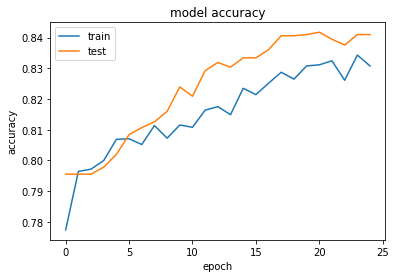

In [51]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

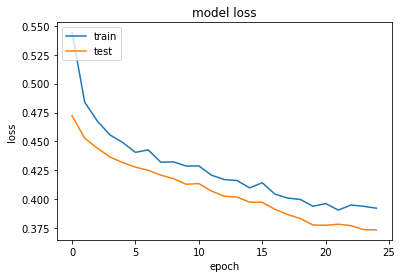

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1527,   68],
       [ 226,  179]])

In [55]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
score

0.853